In [7]:
from plot import load_data
import matplotlib.pyplot as plt
import numpy as np

In [32]:
group_res, cores = load_data()

[[0.009525, 0.304658, 6.22613, 9.79178, 18.6022, 52.2726], [0.007763, 0.202703, 3.5691, 5.82788, 11.9341, 28.9697], [0.145298, 0.430212, 2.41782, 4.08735, 7.48843, 20.7496], [0.250859, 0.259935, 1.8857, 4.02184, 6.81898, 16.6122], [0.178002, 0.247924, 1.55314, 2.82279, 5.16085, 14.726], [0.272097, 0.308854, 1.48566, 2.17987, 4.99936, 13.6064], [0.28181, 0.328481, 1.31401, 2.33127, 5.11209, 12.8164]]


In [33]:
particals = [10, 100, 1000, 1500, 2500, 5000]

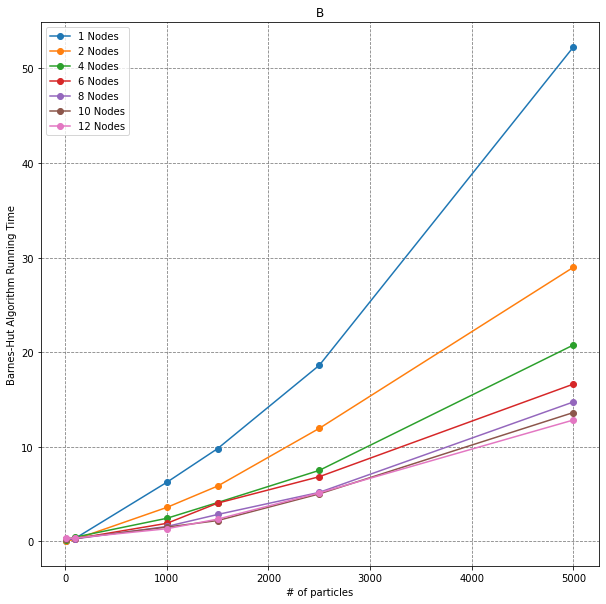

In [81]:
plt.figure(figsize=(10,10))
for i in range(len(group_res)):
    plt.plot(particals, group_res[i], "o-", label=str(cores[i])+" Nodes")
plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.xlabel("# of particles")
plt.ylabel("Barnes-Hut Algorithm Running Time")
plt.title("B")
plt.savefig("nlogn_time.png")
plt.show()

In [35]:
baseline = np.array(group_res[0])
rest = np.array(group_res[1:])

In [36]:
baseline

array([9.52500e-03, 3.04658e-01, 6.22613e+00, 9.79178e+00, 1.86022e+01,
       5.22726e+01])

In [37]:
for i in range(len(rest)):
    rest[i] = baseline / rest[i]

In [38]:
rest

array([[1.22697411, 1.50297726, 1.74445378, 1.68016157, 1.55874343,
        1.80438872],
       [0.06555493, 0.70815784, 2.57510071, 2.39563042, 2.48412551,
        2.51921001],
       [0.03796954, 1.17205455, 3.30176062, 2.4346518 , 2.72800331,
        3.14663922],
       [0.05351063, 1.22883626, 4.00873714, 3.46883048, 3.60448376,
        3.54968084],
       [0.0350059 , 0.98641429, 4.19081755, 4.49191007, 3.72091628,
        3.84176564],
       [0.03379937, 0.92747526, 4.73826683, 4.20019131, 3.63886395,
        4.07857121]])

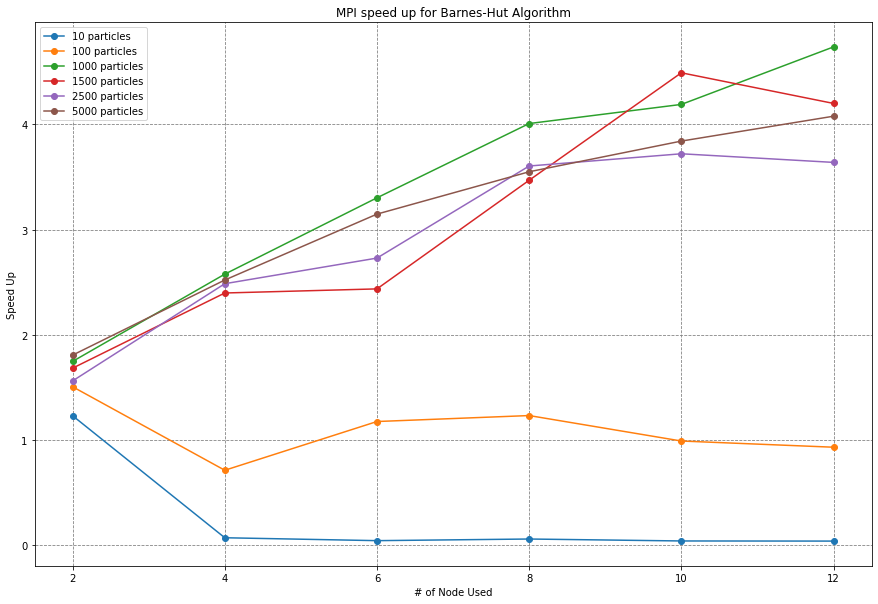

In [82]:
plt.figure(figsize=(15,10))
for i in range(len(rest[0])):
    temp = rest[:,i]
    plt.plot(cores[1:], temp, 'o-', label=str(particals[i]) + " particles")
plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.xlabel("# of Node Used")
plt.ylabel("Speed Up")
plt.title("MPI speed up for Barnes-Hut Algorithm")
plt.savefig("nlogn_speedup.png")
plt.show()

In [ ]:
n2_time = [
    [0.171, 0.107, 0.103, 0.101, 0.119, 0.122, 0.132, 0.139],
    [14.298, 7.958, 6.011, 6.059, 5.332, 5.752, 5.863, 5.921],
    [64.456, 31.5799, 21.432, 16.830, 15.612, 12.2581, 9.327, 8.170],
    [113.164, 56.456, 41.007, 31.949, 30.631, 24.479, 16.284, 14.194],
    [91.995, 49.239, 37.208, 34.144, 30.911, 20.038, 13.207, 11.56],
]

n2_bodies = [
    100,
    1000,
    1500,
    2000,
    2500,
]

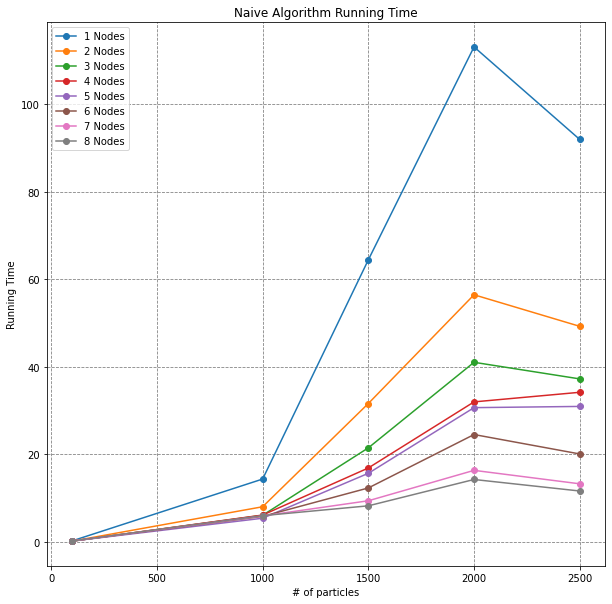

In [86]:
plt.figure(figsize=(10,10))
for i in range(len(n2_time[0])):
    plt.plot(n2_bodies, [n[i] for n in n2_time], "o-", label=str(i+1)+" Nodes")
    
plt.legend()
plt.grid(color='gray', linestyle='dashed')
plt.xlabel("# of particles")
plt.ylabel("Running Time")
plt.title("Naive Algorithm Running Time")
plt.savefig("naive_time.png")
plt.show()

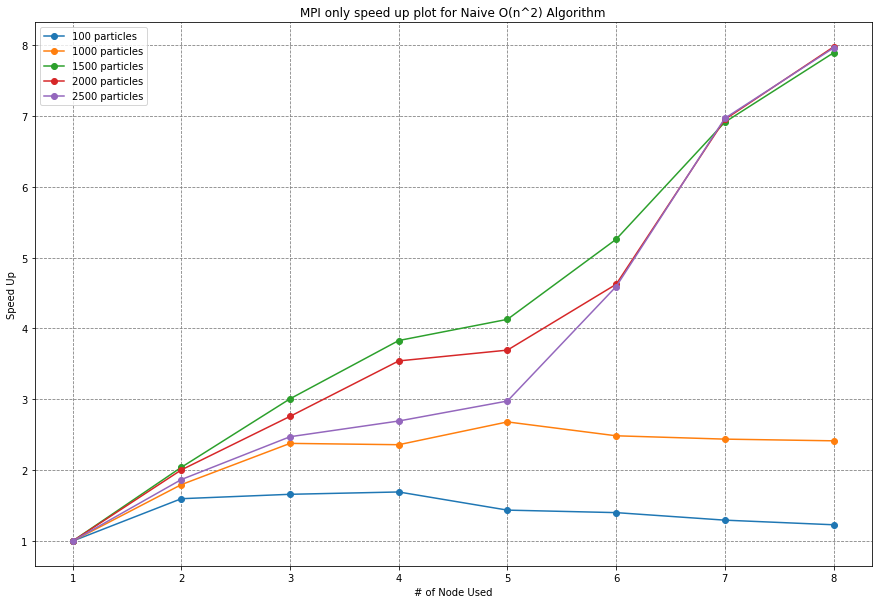

In [85]:
plt.figure(figsize=(15,10))

for i in range(len(n2_time)):
    plt.plot([n+1 for n in range(8)], [n2_time[i][0]/t for t in n2_time[i]], 'o-', label=str(n2_bodies[i]) + " particles")

plt.grid(color='gray', linestyle='dashed')
plt.xlabel("# of Node Used")
plt.ylabel("Speed Up")
plt.title("MPI only speed up plot for Naive O(n^2) Algorithm")
plt.legend()
plt.savefig("naive_speedup.png")
plt.show()

# OMP analysis

In [102]:
import subprocess

In [118]:
data_size = ['1000', '1500', '2500']
algorithm = 'n2'

[20.4152, 10.3036, 6.95004, 5.25684, 4.20682, 3.54711, 3.06343, 2.73033]
[45.7626, 23.129, 15.383, 11.6233, 9.38233, 7.83918, 6.74616, 5.93137]
[127.392, 64.3809, 42.7737, 32.0382, 25.6261, 21.7299, 18.7725, 16.2775]


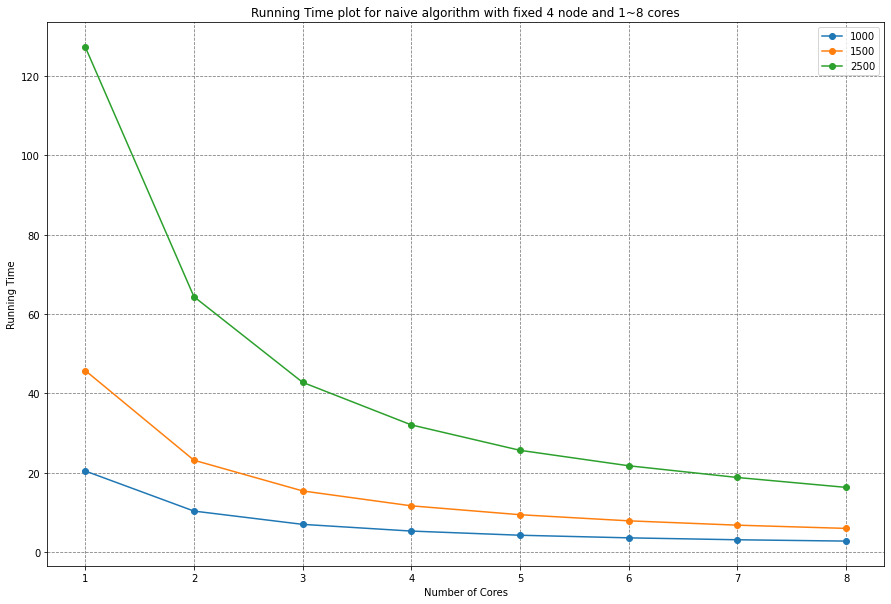

In [123]:
plt.figure(figsize=(15,10))
plt.grid(color='gray', linestyle='dashed')

for d in data_size:
    timing = []
    for i in range(8):
        f = algorithm + "_omp" + str(i+1) + "_" + d + ".out"
        process = subprocess.Popen(['tail', '-n', '1', f],
                 stdout=subprocess.PIPE, 
                 stderr=subprocess.PIPE)
        stdout, _ = process.communicate()
        timing.append(float(str(stdout).split(" ")[-2]))
#     timing = list(map(lambda x:timing[0]/x, timing))
    print(timing)
    plt.plot([i+1 for i in range(8)], timing, 'o-', label=d)

plt.xlabel("Number of Cores")
plt.ylabel('Running Time')
plt.title('Running Time plot for naive algorithm with fixed 4 node and 1~8 cores')
plt.legend()
plt.savefig('n2_omp_runtime.png')
plt.show()

[1.0, 1.9813657362475252, 2.937421942895292, 3.8835498131957595, 4.852881749159698, 5.755445982785986, 6.664164025291911, 7.477191401771947]
[1.0, 1.9785810022050239, 2.974881362543067, 3.9371434962532152, 4.877530421547739, 5.837676899879835, 6.783503504215732, 7.715350753704455]
[1.0, 1.9787235033993, 2.978278708645733, 3.976253347566342, 4.971181724882054, 5.862521226512777, 6.786096683979224, 7.8262632468130855]


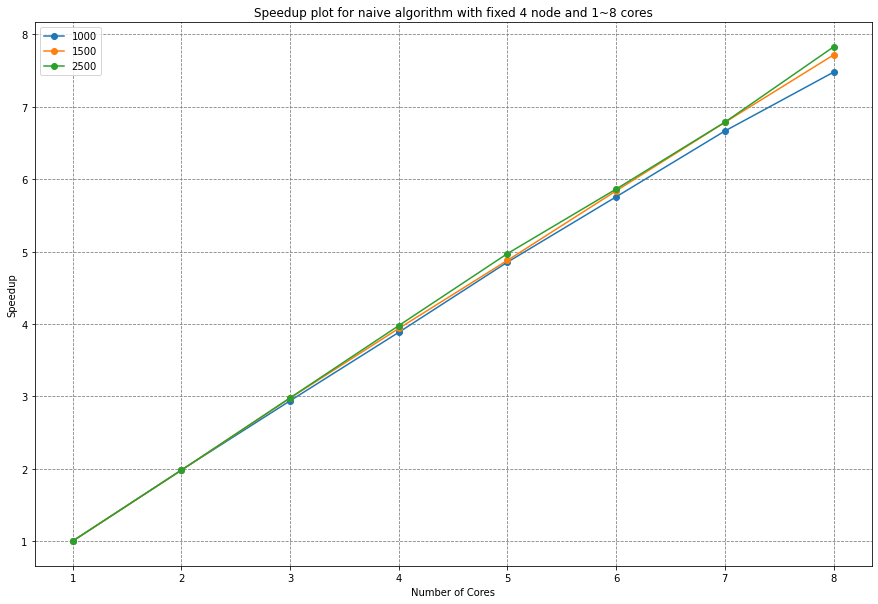

In [124]:
plt.figure(figsize=(15,10))
plt.grid(color='gray', linestyle='dashed')

for d in data_size:
    timing = []
    for i in range(8):
        f = algorithm + "_omp" + str(i+1) + "_" + d + ".out"
        process = subprocess.Popen(['tail', '-n', '1', f],
                 stdout=subprocess.PIPE, 
                 stderr=subprocess.PIPE)
        stdout, _ = process.communicate()
        timing.append(float(str(stdout).split(" ")[-2]))
    timing = list(map(lambda x:timing[0]/x, timing))
    print(timing)
    plt.plot([i+1 for i in range(8)], timing, 'o-', label=d)

plt.xlabel("Number of Cores")
plt.ylabel('Speedup')
plt.title('Speedup plot for naive algorithm with fixed 4 node and 1~8 cores')
plt.legend()
plt.savefig('n2_omp_speedup.png')
plt.show()

In [127]:
algorithm = 'nlogn'

[1.0, 1.4430074815871445, 1.7821831125173027, 1.9714535710379526, 1.598669623059867, 1.7171870263716278, 1.805816135084428, 1.6867290514674607]
[1.0, 1.4773464136079448, 1.796315331699217, 2.006232180253829, 1.6285137889012913, 1.785875918761546, 1.873804025074233, 1.7542566863206897]
[1.0, 1.5259143185077442, 1.9277785851539666, 2.130155195609274, 1.702276253051354, 1.8700486209445997, 1.98793439347265, 1.888065460940416]


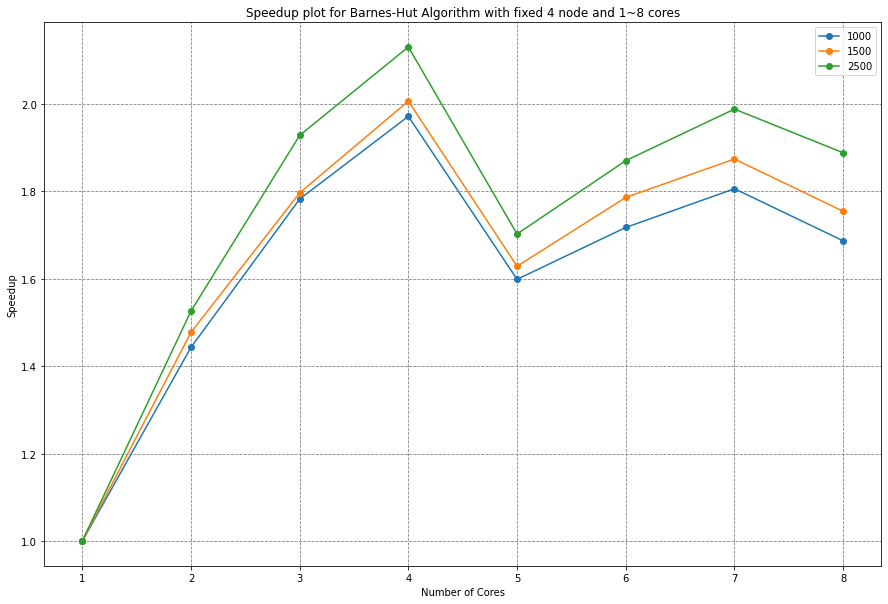

In [130]:
plt.figure(figsize=(15,10))
plt.grid(color='gray', linestyle='dashed')

for d in data_size:
    timing = []
    for i in range(8):
        f = algorithm + "_omp" + str(i+1) + "_" + d + ".out"
        process = subprocess.Popen(['tail', '-n', '1', f],
                 stdout=subprocess.PIPE, 
                 stderr=subprocess.PIPE)
        stdout, _ = process.communicate()
        timing.append(float(str(stdout).split(" ")[-2]))
    timing = list(map(lambda x:timing[0]/x, timing))
    print(timing)
    plt.plot([i+1 for i in range(8)], timing, 'o-', label=d)

plt.xlabel("Number of Cores")
plt.ylabel('Speedup')
plt.title('Speedup plot for Barnes-Hut Algorithm with fixed 4 node and 1~8 cores')
plt.legend()
plt.savefig('nlogn_omp_speedup.png')
plt.show()

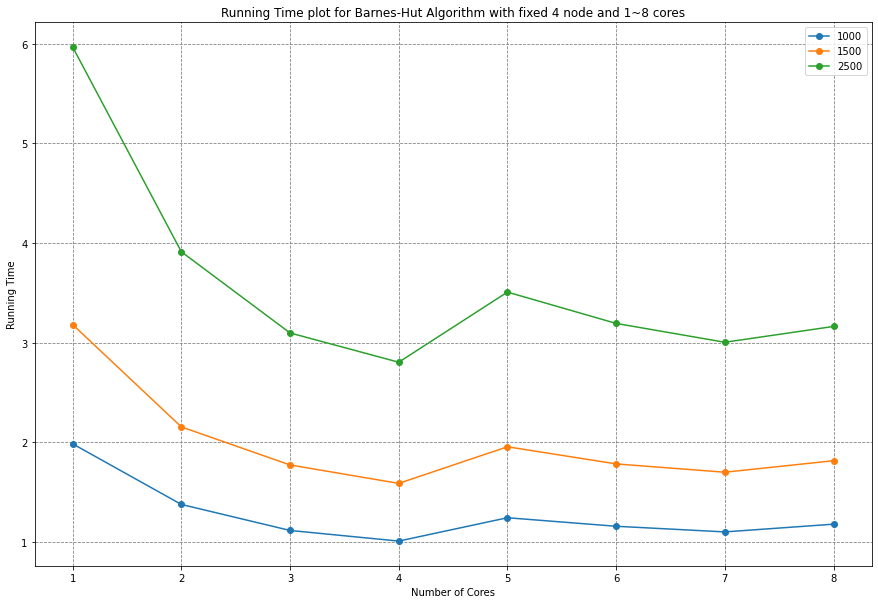

In [129]:
plt.figure(figsize=(15,10))
plt.grid(color='gray', linestyle='dashed')

for d in data_size:
    timing = []
    for i in range(8):
        f = algorithm + "_omp" + str(i+1) + "_" + d + ".out"
        process = subprocess.Popen(['tail', '-n', '1', f],
                 stdout=subprocess.PIPE, 
                 stderr=subprocess.PIPE)
        stdout, _ = process.communicate()
        timing.append(float(str(stdout).split(" ")[-2]))
#     timing = list(map(lambda x:timing[0]/x, timing))
    plt.plot([i+1 for i in range(8)], timing, 'o-', label=d)

plt.xlabel("Number of Cores")
plt.ylabel('Running Time')
plt.title('Running Time plot for Barnes-Hut Algorithm with fixed 4 node and 1~8 cores')
plt.legend()
plt.savefig('nlogn_omp_runtime.png')
plt.show()